# Breaking a CAPTCHA system

Ref: https://medium.com/@ageitgey/how-to-break-a-captcha-system-in-15-minutes-with-machine-learning-dbebb035a710

In [1]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

Install some packages below (if not installed already):

In [2]:
!pip install opencv-python
!pip install imutils
!pip install matplotlib

In this exercise you will break `Really Simple CAPTCHA` plugin of WordPress: https://wordpress.org/plugins/really-simple-captcha/

Try a demo here: https://contactform7.com/captcha/

The plugin generates 4-letter CAPTCHAs using a random mix of four different fonts. Letters are from 'ABCDEFGHJKLMNPQRSTUVWXYZ23456789' and "O", "I" and "1" are not used to avoid user confusion. That leaves us with a total of 32 possible letters and numbers that we need to recognize.

Since we have the source code to the WordPress plug-in, we can modify it to save out CAPTCHA images along with the expected answer for each image. We generated 9955 images under folder `generated_captcha_images`. Run the following code to show 10 images to take a look.

In [3]:
CAPTCHA_IMAGE_FOLDER = "generated_captcha_images"


## Step 1: Extract single letters from CAPTCHA images

In [4]:
import os.path

import glob # glob.glob returns the list of files with their full path, and it supports wildcards


from IPython.display import Image

captcha_image_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER, "*"))

for (i, captcha_image_file) in enumerate(captcha_image_files):
    if i==10: break
    print(captcha_image_file)
    display(Image(filename=captcha_image_file))

generated_captcha_images\222X.png


generated_captcha_images\226U.png


generated_captcha_images\2274.png


generated_captcha_images\22A6.png


generated_captcha_images\22BJ.png


generated_captcha_images\22HS.png


generated_captcha_images\22KD.png


generated_captcha_images\22L9.png


generated_captcha_images\22NR.png


generated_captcha_images\22PL.png


### Run the following code to show 10 images to take a look.

### Now we illustrate how to process an image `generated_captcha_images/222X.png`

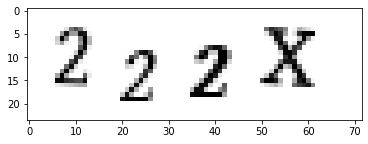

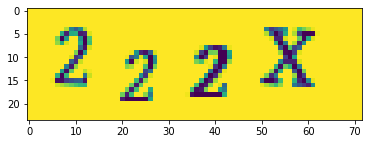

In [5]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt
import cv2 # OpenCV, a popular framework for computer vision and image processing

captcha_image_file = 'generated_captcha_images/222X.png' # normal
# captcha_image_file = 'generated_captcha_images/2W4M.png' # try this: 3 objects, 2 letters are merged
# captcha_image_file = 'generated_captcha_images/3PH3.png' # try this: 5 objects detected
# captcha_image_file = 'generated_captcha_images/JYU4.png' # try this: 6 objects detected

captcha_correct_text = os.path.splitext(captcha_image_file)[0]

# Load the image and convert it to grayscale
image = cv2.imread(captcha_image_file)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Show the image with matplotlib
plt.imshow(image)
plt.show()

plt.imshow(gray)
plt.show()

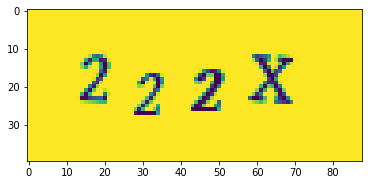

In [6]:
# Add some extra padding around the image
gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

plt.imshow(gray)
plt.show()

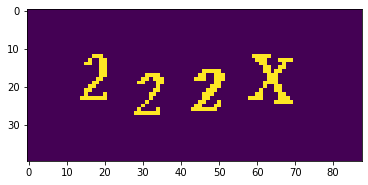

In [7]:
# threshold the image (convert it to pure black and white)
# we use Otsu’s binarization
# check: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

plt.imshow(thresh)
plt.show()

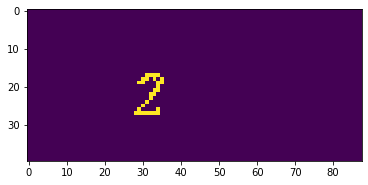

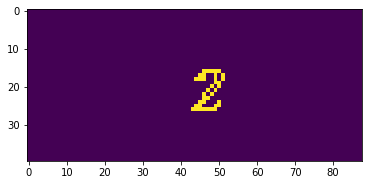

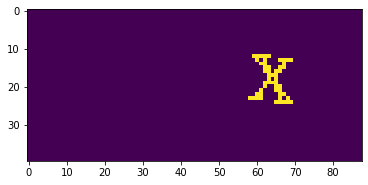

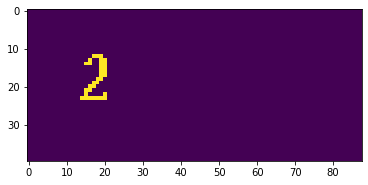

In [8]:
import numpy as np

# find the contours (continuous blobs of pixels) the image
# check:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html#contours-getting-started
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

zero_img = np.zeros_like(thresh)

for i in range(len(contours)):
    temp = cv2.drawContours(zero_img.copy(), contours, i, (255,0,0), 1)
    plt.imshow(temp)
    plt.show()

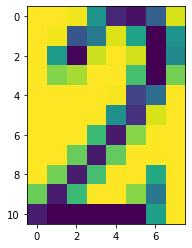

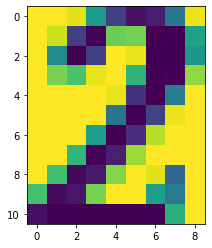

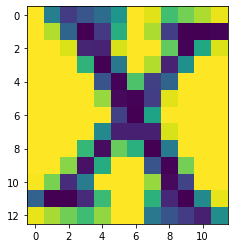

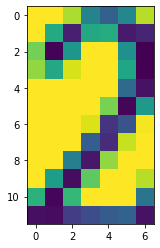

In [9]:
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image = gray[y:y+h, x:x+w]
    
    plt.imshow(letter_image)
    plt.show()

### Putting things together: get letters from images

Using what we have learnt above, write your code to save get the letters of all images. The letter-images are stored as 32 folders under folder `extracted_letter_images`.

For example, `extracted_letter_images/A` is a folder that saves all images of letter `A`. After you complete, each letter-folder should contain over 1000 letter-images.

Hint: (1) consider how to name different files in a letter-folder differently? (2) ingore those images with number of contours other than 4.

In [24]:
import os

LETTER_IMAGES_FOLDER = "extracted_letter_images" # the output for training
SKIPPED_FOLDER = "skipped_images" # those images are skipped
counts = {} # counts['A'] = number of 'A'-images, so that next 'A'-image can be named as counts['A'] + 1
pL=os.getcwd()+'/'+LETTER_IMAGES_FOLDER
pS=os.getcwd()+'/'+SKIPPED_FOLDER
L="ABCDEFGHJKLMNPQRSTUVWXYZ23456789"
print(pL)
print(pS)
# loop over the image paths
    #############################################################################
    # TODO: your code here ...                                                  #
    #############################################################################
if not os.path.exists(pL):
    os.mkdir(pL)
    
if not os.path.exists(pS):
    os.mkdir(pS)

for i in range(len(L)):
    if not os.path.exists(pL+'/'+L[i]):
        os.mkdir(pL+'/'+L[i])
        print("directory",L[i],"created")
    else:
        print("directory",L[i],'already exists')
for l in L:
    counts[l] = 0



for (i, captcha_image_file) in enumerate(captcha_image_files):
    print("[INFO] processing image {}/{}".format(i + 1, len(captcha_image_files)))
    image = cv2.imread(captcha_image_file)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    captcha_correct_text = os.path.splitext(captcha_image_file)[0]
    name = captcha_correct_text[-4:]
    contours2 = sorted(contours, key=lambda  ctr: cv2.boundingRect(ctr)[0])
    

    if len(contours2) == 4:
        for (i, contour2) in enumerate(contours2):
            (x, y, w, h) = cv2.boundingRect(contour2)
            letter_image = thresh[y:y+h, x:x+w]
            cv2.imwrite(pL + "/" + name[i] + "/" + str(counts[name[i]]) + ".png", letter_image)
            counts[name[i]] += 1
    else:
        cv2.imwrite(pS + "/" + name + ".png", image)
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################
    
    
    
    

C:\Users\user\Desktop\UAB\CS685\assignment1/extracted_letter_images
C:\Users\user\Desktop\UAB\CS685\assignment1/skipped_images
directory A created
directory B created
directory C created
directory D created
directory E created
directory F created
directory G created
directory H created
directory J created
directory K created
directory L created
directory M created
directory N created
directory P created
directory Q created
directory R created
directory S created
directory T created
directory U created
directory V created
directory W created
directory X created
directory Y created
directory Z created
directory 2 created
directory 3 created
directory 4 created
directory 5 created
directory 6 created
directory 7 created
directory 8 created
directory 9 created
[INFO] processing image 1/9955
[INFO] processing image 2/9955
[INFO] processing image 3/9955
[INFO] processing image 4/9955
[INFO] processing image 5/9955
[INFO] processing image 6/9955
[INFO] processing image 7/9955
[INFO] processin

[INFO] processing image 245/9955
[INFO] processing image 246/9955
[INFO] processing image 247/9955
[INFO] processing image 248/9955
[INFO] processing image 249/9955
[INFO] processing image 250/9955
[INFO] processing image 251/9955
[INFO] processing image 252/9955
[INFO] processing image 253/9955
[INFO] processing image 254/9955
[INFO] processing image 255/9955
[INFO] processing image 256/9955
[INFO] processing image 257/9955
[INFO] processing image 258/9955
[INFO] processing image 259/9955
[INFO] processing image 260/9955
[INFO] processing image 261/9955
[INFO] processing image 262/9955
[INFO] processing image 263/9955
[INFO] processing image 264/9955
[INFO] processing image 265/9955
[INFO] processing image 266/9955
[INFO] processing image 267/9955
[INFO] processing image 268/9955
[INFO] processing image 269/9955
[INFO] processing image 270/9955
[INFO] processing image 271/9955
[INFO] processing image 272/9955
[INFO] processing image 273/9955
[INFO] processing image 274/9955
[INFO] pro

[INFO] processing image 506/9955
[INFO] processing image 507/9955
[INFO] processing image 508/9955
[INFO] processing image 509/9955
[INFO] processing image 510/9955
[INFO] processing image 511/9955
[INFO] processing image 512/9955
[INFO] processing image 513/9955
[INFO] processing image 514/9955
[INFO] processing image 515/9955
[INFO] processing image 516/9955
[INFO] processing image 517/9955
[INFO] processing image 518/9955
[INFO] processing image 519/9955
[INFO] processing image 520/9955
[INFO] processing image 521/9955
[INFO] processing image 522/9955
[INFO] processing image 523/9955
[INFO] processing image 524/9955
[INFO] processing image 525/9955
[INFO] processing image 526/9955
[INFO] processing image 527/9955
[INFO] processing image 528/9955
[INFO] processing image 529/9955
[INFO] processing image 530/9955
[INFO] processing image 531/9955
[INFO] processing image 532/9955
[INFO] processing image 533/9955
[INFO] processing image 534/9955
[INFO] processing image 535/9955
[INFO] pro

[INFO] processing image 757/9955
[INFO] processing image 758/9955
[INFO] processing image 759/9955
[INFO] processing image 760/9955
[INFO] processing image 761/9955
[INFO] processing image 762/9955
[INFO] processing image 763/9955
[INFO] processing image 764/9955
[INFO] processing image 765/9955
[INFO] processing image 766/9955
[INFO] processing image 767/9955
[INFO] processing image 768/9955
[INFO] processing image 769/9955
[INFO] processing image 770/9955
[INFO] processing image 771/9955
[INFO] processing image 772/9955
[INFO] processing image 773/9955
[INFO] processing image 774/9955
[INFO] processing image 775/9955
[INFO] processing image 776/9955
[INFO] processing image 777/9955
[INFO] processing image 778/9955
[INFO] processing image 779/9955
[INFO] processing image 780/9955
[INFO] processing image 781/9955
[INFO] processing image 782/9955
[INFO] processing image 783/9955
[INFO] processing image 784/9955
[INFO] processing image 785/9955
[INFO] processing image 786/9955
[INFO] pro

[INFO] processing image 1022/9955
[INFO] processing image 1023/9955
[INFO] processing image 1024/9955
[INFO] processing image 1025/9955
[INFO] processing image 1026/9955
[INFO] processing image 1027/9955
[INFO] processing image 1028/9955
[INFO] processing image 1029/9955
[INFO] processing image 1030/9955
[INFO] processing image 1031/9955
[INFO] processing image 1032/9955
[INFO] processing image 1033/9955
[INFO] processing image 1034/9955
[INFO] processing image 1035/9955
[INFO] processing image 1036/9955
[INFO] processing image 1037/9955
[INFO] processing image 1038/9955
[INFO] processing image 1039/9955
[INFO] processing image 1040/9955
[INFO] processing image 1041/9955
[INFO] processing image 1042/9955
[INFO] processing image 1043/9955
[INFO] processing image 1044/9955
[INFO] processing image 1045/9955
[INFO] processing image 1046/9955
[INFO] processing image 1047/9955
[INFO] processing image 1048/9955
[INFO] processing image 1049/9955
[INFO] processing image 1050/9955
[INFO] process

[INFO] processing image 1266/9955
[INFO] processing image 1267/9955
[INFO] processing image 1268/9955
[INFO] processing image 1269/9955
[INFO] processing image 1270/9955
[INFO] processing image 1271/9955
[INFO] processing image 1272/9955
[INFO] processing image 1273/9955
[INFO] processing image 1274/9955
[INFO] processing image 1275/9955
[INFO] processing image 1276/9955
[INFO] processing image 1277/9955
[INFO] processing image 1278/9955
[INFO] processing image 1279/9955
[INFO] processing image 1280/9955
[INFO] processing image 1281/9955
[INFO] processing image 1282/9955
[INFO] processing image 1283/9955
[INFO] processing image 1284/9955
[INFO] processing image 1285/9955
[INFO] processing image 1286/9955
[INFO] processing image 1287/9955
[INFO] processing image 1288/9955
[INFO] processing image 1289/9955
[INFO] processing image 1290/9955
[INFO] processing image 1291/9955
[INFO] processing image 1292/9955
[INFO] processing image 1293/9955
[INFO] processing image 1294/9955
[INFO] process

[INFO] processing image 1508/9955
[INFO] processing image 1509/9955
[INFO] processing image 1510/9955
[INFO] processing image 1511/9955
[INFO] processing image 1512/9955
[INFO] processing image 1513/9955
[INFO] processing image 1514/9955
[INFO] processing image 1515/9955
[INFO] processing image 1516/9955
[INFO] processing image 1517/9955
[INFO] processing image 1518/9955
[INFO] processing image 1519/9955
[INFO] processing image 1520/9955
[INFO] processing image 1521/9955
[INFO] processing image 1522/9955
[INFO] processing image 1523/9955
[INFO] processing image 1524/9955
[INFO] processing image 1525/9955
[INFO] processing image 1526/9955
[INFO] processing image 1527/9955
[INFO] processing image 1528/9955
[INFO] processing image 1529/9955
[INFO] processing image 1530/9955
[INFO] processing image 1531/9955
[INFO] processing image 1532/9955
[INFO] processing image 1533/9955
[INFO] processing image 1534/9955
[INFO] processing image 1535/9955
[INFO] processing image 1536/9955
[INFO] process

[INFO] processing image 1771/9955
[INFO] processing image 1772/9955
[INFO] processing image 1773/9955
[INFO] processing image 1774/9955
[INFO] processing image 1775/9955
[INFO] processing image 1776/9955
[INFO] processing image 1777/9955
[INFO] processing image 1778/9955
[INFO] processing image 1779/9955
[INFO] processing image 1780/9955
[INFO] processing image 1781/9955
[INFO] processing image 1782/9955
[INFO] processing image 1783/9955
[INFO] processing image 1784/9955
[INFO] processing image 1785/9955
[INFO] processing image 1786/9955
[INFO] processing image 1787/9955
[INFO] processing image 1788/9955
[INFO] processing image 1789/9955
[INFO] processing image 1790/9955
[INFO] processing image 1791/9955
[INFO] processing image 1792/9955
[INFO] processing image 1793/9955
[INFO] processing image 1794/9955
[INFO] processing image 1795/9955
[INFO] processing image 1796/9955
[INFO] processing image 1797/9955
[INFO] processing image 1798/9955
[INFO] processing image 1799/9955
[INFO] process

[INFO] processing image 2016/9955
[INFO] processing image 2017/9955
[INFO] processing image 2018/9955
[INFO] processing image 2019/9955
[INFO] processing image 2020/9955
[INFO] processing image 2021/9955
[INFO] processing image 2022/9955
[INFO] processing image 2023/9955
[INFO] processing image 2024/9955
[INFO] processing image 2025/9955
[INFO] processing image 2026/9955
[INFO] processing image 2027/9955
[INFO] processing image 2028/9955
[INFO] processing image 2029/9955
[INFO] processing image 2030/9955
[INFO] processing image 2031/9955
[INFO] processing image 2032/9955
[INFO] processing image 2033/9955
[INFO] processing image 2034/9955
[INFO] processing image 2035/9955
[INFO] processing image 2036/9955
[INFO] processing image 2037/9955
[INFO] processing image 2038/9955
[INFO] processing image 2039/9955
[INFO] processing image 2040/9955
[INFO] processing image 2041/9955
[INFO] processing image 2042/9955
[INFO] processing image 2043/9955
[INFO] processing image 2044/9955
[INFO] process

[INFO] processing image 2273/9955
[INFO] processing image 2274/9955
[INFO] processing image 2275/9955
[INFO] processing image 2276/9955
[INFO] processing image 2277/9955
[INFO] processing image 2278/9955
[INFO] processing image 2279/9955
[INFO] processing image 2280/9955
[INFO] processing image 2281/9955
[INFO] processing image 2282/9955
[INFO] processing image 2283/9955
[INFO] processing image 2284/9955
[INFO] processing image 2285/9955
[INFO] processing image 2286/9955
[INFO] processing image 2287/9955
[INFO] processing image 2288/9955
[INFO] processing image 2289/9955
[INFO] processing image 2290/9955
[INFO] processing image 2291/9955
[INFO] processing image 2292/9955
[INFO] processing image 2293/9955
[INFO] processing image 2294/9955
[INFO] processing image 2295/9955
[INFO] processing image 2296/9955
[INFO] processing image 2297/9955
[INFO] processing image 2298/9955
[INFO] processing image 2299/9955
[INFO] processing image 2300/9955
[INFO] processing image 2301/9955
[INFO] process

[INFO] processing image 2528/9955
[INFO] processing image 2529/9955
[INFO] processing image 2530/9955
[INFO] processing image 2531/9955
[INFO] processing image 2532/9955
[INFO] processing image 2533/9955
[INFO] processing image 2534/9955
[INFO] processing image 2535/9955
[INFO] processing image 2536/9955
[INFO] processing image 2537/9955
[INFO] processing image 2538/9955
[INFO] processing image 2539/9955
[INFO] processing image 2540/9955
[INFO] processing image 2541/9955
[INFO] processing image 2542/9955
[INFO] processing image 2543/9955
[INFO] processing image 2544/9955
[INFO] processing image 2545/9955
[INFO] processing image 2546/9955
[INFO] processing image 2547/9955
[INFO] processing image 2548/9955
[INFO] processing image 2549/9955
[INFO] processing image 2550/9955
[INFO] processing image 2551/9955
[INFO] processing image 2552/9955
[INFO] processing image 2553/9955
[INFO] processing image 2554/9955
[INFO] processing image 2555/9955
[INFO] processing image 2556/9955
[INFO] process

[INFO] processing image 2777/9955
[INFO] processing image 2778/9955
[INFO] processing image 2779/9955
[INFO] processing image 2780/9955
[INFO] processing image 2781/9955
[INFO] processing image 2782/9955
[INFO] processing image 2783/9955
[INFO] processing image 2784/9955
[INFO] processing image 2785/9955
[INFO] processing image 2786/9955
[INFO] processing image 2787/9955
[INFO] processing image 2788/9955
[INFO] processing image 2789/9955
[INFO] processing image 2790/9955
[INFO] processing image 2791/9955
[INFO] processing image 2792/9955
[INFO] processing image 2793/9955
[INFO] processing image 2794/9955
[INFO] processing image 2795/9955
[INFO] processing image 2796/9955
[INFO] processing image 2797/9955
[INFO] processing image 2798/9955
[INFO] processing image 2799/9955
[INFO] processing image 2800/9955
[INFO] processing image 2801/9955
[INFO] processing image 2802/9955
[INFO] processing image 2803/9955
[INFO] processing image 2804/9955
[INFO] processing image 2805/9955
[INFO] process

[INFO] processing image 3021/9955
[INFO] processing image 3022/9955
[INFO] processing image 3023/9955
[INFO] processing image 3024/9955
[INFO] processing image 3025/9955
[INFO] processing image 3026/9955
[INFO] processing image 3027/9955
[INFO] processing image 3028/9955
[INFO] processing image 3029/9955
[INFO] processing image 3030/9955
[INFO] processing image 3031/9955
[INFO] processing image 3032/9955
[INFO] processing image 3033/9955
[INFO] processing image 3034/9955
[INFO] processing image 3035/9955
[INFO] processing image 3036/9955
[INFO] processing image 3037/9955
[INFO] processing image 3038/9955
[INFO] processing image 3039/9955
[INFO] processing image 3040/9955
[INFO] processing image 3041/9955
[INFO] processing image 3042/9955
[INFO] processing image 3043/9955
[INFO] processing image 3044/9955
[INFO] processing image 3045/9955
[INFO] processing image 3046/9955
[INFO] processing image 3047/9955
[INFO] processing image 3048/9955
[INFO] processing image 3049/9955
[INFO] process

[INFO] processing image 3287/9955
[INFO] processing image 3288/9955
[INFO] processing image 3289/9955
[INFO] processing image 3290/9955
[INFO] processing image 3291/9955
[INFO] processing image 3292/9955
[INFO] processing image 3293/9955
[INFO] processing image 3294/9955
[INFO] processing image 3295/9955
[INFO] processing image 3296/9955
[INFO] processing image 3297/9955
[INFO] processing image 3298/9955
[INFO] processing image 3299/9955
[INFO] processing image 3300/9955
[INFO] processing image 3301/9955
[INFO] processing image 3302/9955
[INFO] processing image 3303/9955
[INFO] processing image 3304/9955
[INFO] processing image 3305/9955
[INFO] processing image 3306/9955
[INFO] processing image 3307/9955
[INFO] processing image 3308/9955
[INFO] processing image 3309/9955
[INFO] processing image 3310/9955
[INFO] processing image 3311/9955
[INFO] processing image 3312/9955
[INFO] processing image 3313/9955
[INFO] processing image 3314/9955
[INFO] processing image 3315/9955
[INFO] process

[INFO] processing image 3534/9955
[INFO] processing image 3535/9955
[INFO] processing image 3536/9955
[INFO] processing image 3537/9955
[INFO] processing image 3538/9955
[INFO] processing image 3539/9955
[INFO] processing image 3540/9955
[INFO] processing image 3541/9955
[INFO] processing image 3542/9955
[INFO] processing image 3543/9955
[INFO] processing image 3544/9955
[INFO] processing image 3545/9955
[INFO] processing image 3546/9955
[INFO] processing image 3547/9955
[INFO] processing image 3548/9955
[INFO] processing image 3549/9955
[INFO] processing image 3550/9955
[INFO] processing image 3551/9955
[INFO] processing image 3552/9955
[INFO] processing image 3553/9955
[INFO] processing image 3554/9955
[INFO] processing image 3555/9955
[INFO] processing image 3556/9955
[INFO] processing image 3557/9955
[INFO] processing image 3558/9955
[INFO] processing image 3559/9955
[INFO] processing image 3560/9955
[INFO] processing image 3561/9955
[INFO] processing image 3562/9955
[INFO] process

[INFO] processing image 3805/9955
[INFO] processing image 3806/9955
[INFO] processing image 3807/9955
[INFO] processing image 3808/9955
[INFO] processing image 3809/9955
[INFO] processing image 3810/9955
[INFO] processing image 3811/9955
[INFO] processing image 3812/9955
[INFO] processing image 3813/9955
[INFO] processing image 3814/9955
[INFO] processing image 3815/9955
[INFO] processing image 3816/9955
[INFO] processing image 3817/9955
[INFO] processing image 3818/9955
[INFO] processing image 3819/9955
[INFO] processing image 3820/9955
[INFO] processing image 3821/9955
[INFO] processing image 3822/9955
[INFO] processing image 3823/9955
[INFO] processing image 3824/9955
[INFO] processing image 3825/9955
[INFO] processing image 3826/9955
[INFO] processing image 3827/9955
[INFO] processing image 3828/9955
[INFO] processing image 3829/9955
[INFO] processing image 3830/9955
[INFO] processing image 3831/9955
[INFO] processing image 3832/9955
[INFO] processing image 3833/9955
[INFO] process

[INFO] processing image 4071/9955
[INFO] processing image 4072/9955
[INFO] processing image 4073/9955
[INFO] processing image 4074/9955
[INFO] processing image 4075/9955
[INFO] processing image 4076/9955
[INFO] processing image 4077/9955
[INFO] processing image 4078/9955
[INFO] processing image 4079/9955
[INFO] processing image 4080/9955
[INFO] processing image 4081/9955
[INFO] processing image 4082/9955
[INFO] processing image 4083/9955
[INFO] processing image 4084/9955
[INFO] processing image 4085/9955
[INFO] processing image 4086/9955
[INFO] processing image 4087/9955
[INFO] processing image 4088/9955
[INFO] processing image 4089/9955
[INFO] processing image 4090/9955
[INFO] processing image 4091/9955
[INFO] processing image 4092/9955
[INFO] processing image 4093/9955
[INFO] processing image 4094/9955
[INFO] processing image 4095/9955
[INFO] processing image 4096/9955
[INFO] processing image 4097/9955
[INFO] processing image 4098/9955
[INFO] processing image 4099/9955
[INFO] process

[INFO] processing image 4335/9955
[INFO] processing image 4336/9955
[INFO] processing image 4337/9955
[INFO] processing image 4338/9955
[INFO] processing image 4339/9955
[INFO] processing image 4340/9955
[INFO] processing image 4341/9955
[INFO] processing image 4342/9955
[INFO] processing image 4343/9955
[INFO] processing image 4344/9955
[INFO] processing image 4345/9955
[INFO] processing image 4346/9955
[INFO] processing image 4347/9955
[INFO] processing image 4348/9955
[INFO] processing image 4349/9955
[INFO] processing image 4350/9955
[INFO] processing image 4351/9955
[INFO] processing image 4352/9955
[INFO] processing image 4353/9955
[INFO] processing image 4354/9955
[INFO] processing image 4355/9955
[INFO] processing image 4356/9955
[INFO] processing image 4357/9955
[INFO] processing image 4358/9955
[INFO] processing image 4359/9955
[INFO] processing image 4360/9955
[INFO] processing image 4361/9955
[INFO] processing image 4362/9955
[INFO] processing image 4363/9955
[INFO] process

[INFO] processing image 4576/9955
[INFO] processing image 4577/9955
[INFO] processing image 4578/9955
[INFO] processing image 4579/9955
[INFO] processing image 4580/9955
[INFO] processing image 4581/9955
[INFO] processing image 4582/9955
[INFO] processing image 4583/9955
[INFO] processing image 4584/9955
[INFO] processing image 4585/9955
[INFO] processing image 4586/9955
[INFO] processing image 4587/9955
[INFO] processing image 4588/9955
[INFO] processing image 4589/9955
[INFO] processing image 4590/9955
[INFO] processing image 4591/9955
[INFO] processing image 4592/9955
[INFO] processing image 4593/9955
[INFO] processing image 4594/9955
[INFO] processing image 4595/9955
[INFO] processing image 4596/9955
[INFO] processing image 4597/9955
[INFO] processing image 4598/9955
[INFO] processing image 4599/9955
[INFO] processing image 4600/9955
[INFO] processing image 4601/9955
[INFO] processing image 4602/9955
[INFO] processing image 4603/9955
[INFO] processing image 4604/9955
[INFO] process

[INFO] processing image 4816/9955
[INFO] processing image 4817/9955
[INFO] processing image 4818/9955
[INFO] processing image 4819/9955
[INFO] processing image 4820/9955
[INFO] processing image 4821/9955
[INFO] processing image 4822/9955
[INFO] processing image 4823/9955
[INFO] processing image 4824/9955
[INFO] processing image 4825/9955
[INFO] processing image 4826/9955
[INFO] processing image 4827/9955
[INFO] processing image 4828/9955
[INFO] processing image 4829/9955
[INFO] processing image 4830/9955
[INFO] processing image 4831/9955
[INFO] processing image 4832/9955
[INFO] processing image 4833/9955
[INFO] processing image 4834/9955
[INFO] processing image 4835/9955
[INFO] processing image 4836/9955
[INFO] processing image 4837/9955
[INFO] processing image 4838/9955
[INFO] processing image 4839/9955
[INFO] processing image 4840/9955
[INFO] processing image 4841/9955
[INFO] processing image 4842/9955
[INFO] processing image 4843/9955
[INFO] processing image 4844/9955
[INFO] process

[INFO] processing image 5084/9955
[INFO] processing image 5085/9955
[INFO] processing image 5086/9955
[INFO] processing image 5087/9955
[INFO] processing image 5088/9955
[INFO] processing image 5089/9955
[INFO] processing image 5090/9955
[INFO] processing image 5091/9955
[INFO] processing image 5092/9955
[INFO] processing image 5093/9955
[INFO] processing image 5094/9955
[INFO] processing image 5095/9955
[INFO] processing image 5096/9955
[INFO] processing image 5097/9955
[INFO] processing image 5098/9955
[INFO] processing image 5099/9955
[INFO] processing image 5100/9955
[INFO] processing image 5101/9955
[INFO] processing image 5102/9955
[INFO] processing image 5103/9955
[INFO] processing image 5104/9955
[INFO] processing image 5105/9955
[INFO] processing image 5106/9955
[INFO] processing image 5107/9955
[INFO] processing image 5108/9955
[INFO] processing image 5109/9955
[INFO] processing image 5110/9955
[INFO] processing image 5111/9955
[INFO] processing image 5112/9955
[INFO] process

[INFO] processing image 5345/9955
[INFO] processing image 5346/9955
[INFO] processing image 5347/9955
[INFO] processing image 5348/9955
[INFO] processing image 5349/9955
[INFO] processing image 5350/9955
[INFO] processing image 5351/9955
[INFO] processing image 5352/9955
[INFO] processing image 5353/9955
[INFO] processing image 5354/9955
[INFO] processing image 5355/9955
[INFO] processing image 5356/9955
[INFO] processing image 5357/9955
[INFO] processing image 5358/9955
[INFO] processing image 5359/9955
[INFO] processing image 5360/9955
[INFO] processing image 5361/9955
[INFO] processing image 5362/9955
[INFO] processing image 5363/9955
[INFO] processing image 5364/9955
[INFO] processing image 5365/9955
[INFO] processing image 5366/9955
[INFO] processing image 5367/9955
[INFO] processing image 5368/9955
[INFO] processing image 5369/9955
[INFO] processing image 5370/9955
[INFO] processing image 5371/9955
[INFO] processing image 5372/9955
[INFO] processing image 5373/9955
[INFO] process

[INFO] processing image 5603/9955
[INFO] processing image 5604/9955
[INFO] processing image 5605/9955
[INFO] processing image 5606/9955
[INFO] processing image 5607/9955
[INFO] processing image 5608/9955
[INFO] processing image 5609/9955
[INFO] processing image 5610/9955
[INFO] processing image 5611/9955
[INFO] processing image 5612/9955
[INFO] processing image 5613/9955
[INFO] processing image 5614/9955
[INFO] processing image 5615/9955
[INFO] processing image 5616/9955
[INFO] processing image 5617/9955
[INFO] processing image 5618/9955
[INFO] processing image 5619/9955
[INFO] processing image 5620/9955
[INFO] processing image 5621/9955
[INFO] processing image 5622/9955
[INFO] processing image 5623/9955
[INFO] processing image 5624/9955
[INFO] processing image 5625/9955
[INFO] processing image 5626/9955
[INFO] processing image 5627/9955
[INFO] processing image 5628/9955
[INFO] processing image 5629/9955
[INFO] processing image 5630/9955
[INFO] processing image 5631/9955
[INFO] process

[INFO] processing image 5857/9955
[INFO] processing image 5858/9955
[INFO] processing image 5859/9955
[INFO] processing image 5860/9955
[INFO] processing image 5861/9955
[INFO] processing image 5862/9955
[INFO] processing image 5863/9955
[INFO] processing image 5864/9955
[INFO] processing image 5865/9955
[INFO] processing image 5866/9955
[INFO] processing image 5867/9955
[INFO] processing image 5868/9955
[INFO] processing image 5869/9955
[INFO] processing image 5870/9955
[INFO] processing image 5871/9955
[INFO] processing image 5872/9955
[INFO] processing image 5873/9955
[INFO] processing image 5874/9955
[INFO] processing image 5875/9955
[INFO] processing image 5876/9955
[INFO] processing image 5877/9955
[INFO] processing image 5878/9955
[INFO] processing image 5879/9955
[INFO] processing image 5880/9955
[INFO] processing image 5881/9955
[INFO] processing image 5882/9955
[INFO] processing image 5883/9955
[INFO] processing image 5884/9955
[INFO] processing image 5885/9955
[INFO] process

[INFO] processing image 6100/9955
[INFO] processing image 6101/9955
[INFO] processing image 6102/9955
[INFO] processing image 6103/9955
[INFO] processing image 6104/9955
[INFO] processing image 6105/9955
[INFO] processing image 6106/9955
[INFO] processing image 6107/9955
[INFO] processing image 6108/9955
[INFO] processing image 6109/9955
[INFO] processing image 6110/9955
[INFO] processing image 6111/9955
[INFO] processing image 6112/9955
[INFO] processing image 6113/9955
[INFO] processing image 6114/9955
[INFO] processing image 6115/9955
[INFO] processing image 6116/9955
[INFO] processing image 6117/9955
[INFO] processing image 6118/9955
[INFO] processing image 6119/9955
[INFO] processing image 6120/9955
[INFO] processing image 6121/9955
[INFO] processing image 6122/9955
[INFO] processing image 6123/9955
[INFO] processing image 6124/9955
[INFO] processing image 6125/9955
[INFO] processing image 6126/9955
[INFO] processing image 6127/9955
[INFO] processing image 6128/9955
[INFO] process

[INFO] processing image 6359/9955
[INFO] processing image 6360/9955
[INFO] processing image 6361/9955
[INFO] processing image 6362/9955
[INFO] processing image 6363/9955
[INFO] processing image 6364/9955
[INFO] processing image 6365/9955
[INFO] processing image 6366/9955
[INFO] processing image 6367/9955
[INFO] processing image 6368/9955
[INFO] processing image 6369/9955
[INFO] processing image 6370/9955
[INFO] processing image 6371/9955
[INFO] processing image 6372/9955
[INFO] processing image 6373/9955
[INFO] processing image 6374/9955
[INFO] processing image 6375/9955
[INFO] processing image 6376/9955
[INFO] processing image 6377/9955
[INFO] processing image 6378/9955
[INFO] processing image 6379/9955
[INFO] processing image 6380/9955
[INFO] processing image 6381/9955
[INFO] processing image 6382/9955
[INFO] processing image 6383/9955
[INFO] processing image 6384/9955
[INFO] processing image 6385/9955
[INFO] processing image 6386/9955
[INFO] processing image 6387/9955
[INFO] process

[INFO] processing image 6605/9955
[INFO] processing image 6606/9955
[INFO] processing image 6607/9955
[INFO] processing image 6608/9955
[INFO] processing image 6609/9955
[INFO] processing image 6610/9955
[INFO] processing image 6611/9955
[INFO] processing image 6612/9955
[INFO] processing image 6613/9955
[INFO] processing image 6614/9955
[INFO] processing image 6615/9955
[INFO] processing image 6616/9955
[INFO] processing image 6617/9955
[INFO] processing image 6618/9955
[INFO] processing image 6619/9955
[INFO] processing image 6620/9955
[INFO] processing image 6621/9955
[INFO] processing image 6622/9955
[INFO] processing image 6623/9955
[INFO] processing image 6624/9955
[INFO] processing image 6625/9955
[INFO] processing image 6626/9955
[INFO] processing image 6627/9955
[INFO] processing image 6628/9955
[INFO] processing image 6629/9955
[INFO] processing image 6630/9955
[INFO] processing image 6631/9955
[INFO] processing image 6632/9955
[INFO] processing image 6633/9955
[INFO] process

[INFO] processing image 6873/9955
[INFO] processing image 6874/9955
[INFO] processing image 6875/9955
[INFO] processing image 6876/9955
[INFO] processing image 6877/9955
[INFO] processing image 6878/9955
[INFO] processing image 6879/9955
[INFO] processing image 6880/9955
[INFO] processing image 6881/9955
[INFO] processing image 6882/9955
[INFO] processing image 6883/9955
[INFO] processing image 6884/9955
[INFO] processing image 6885/9955
[INFO] processing image 6886/9955
[INFO] processing image 6887/9955
[INFO] processing image 6888/9955
[INFO] processing image 6889/9955
[INFO] processing image 6890/9955
[INFO] processing image 6891/9955
[INFO] processing image 6892/9955
[INFO] processing image 6893/9955
[INFO] processing image 6894/9955
[INFO] processing image 6895/9955
[INFO] processing image 6896/9955
[INFO] processing image 6897/9955
[INFO] processing image 6898/9955
[INFO] processing image 6899/9955
[INFO] processing image 6900/9955
[INFO] processing image 6901/9955
[INFO] process

[INFO] processing image 7118/9955
[INFO] processing image 7119/9955
[INFO] processing image 7120/9955
[INFO] processing image 7121/9955
[INFO] processing image 7122/9955
[INFO] processing image 7123/9955
[INFO] processing image 7124/9955
[INFO] processing image 7125/9955
[INFO] processing image 7126/9955
[INFO] processing image 7127/9955
[INFO] processing image 7128/9955
[INFO] processing image 7129/9955
[INFO] processing image 7130/9955
[INFO] processing image 7131/9955
[INFO] processing image 7132/9955
[INFO] processing image 7133/9955
[INFO] processing image 7134/9955
[INFO] processing image 7135/9955
[INFO] processing image 7136/9955
[INFO] processing image 7137/9955
[INFO] processing image 7138/9955
[INFO] processing image 7139/9955
[INFO] processing image 7140/9955
[INFO] processing image 7141/9955
[INFO] processing image 7142/9955
[INFO] processing image 7143/9955
[INFO] processing image 7144/9955
[INFO] processing image 7145/9955
[INFO] processing image 7146/9955
[INFO] process

[INFO] processing image 7360/9955
[INFO] processing image 7361/9955
[INFO] processing image 7362/9955
[INFO] processing image 7363/9955
[INFO] processing image 7364/9955
[INFO] processing image 7365/9955
[INFO] processing image 7366/9955
[INFO] processing image 7367/9955
[INFO] processing image 7368/9955
[INFO] processing image 7369/9955
[INFO] processing image 7370/9955
[INFO] processing image 7371/9955
[INFO] processing image 7372/9955
[INFO] processing image 7373/9955
[INFO] processing image 7374/9955
[INFO] processing image 7375/9955
[INFO] processing image 7376/9955
[INFO] processing image 7377/9955
[INFO] processing image 7378/9955
[INFO] processing image 7379/9955
[INFO] processing image 7380/9955
[INFO] processing image 7381/9955
[INFO] processing image 7382/9955
[INFO] processing image 7383/9955
[INFO] processing image 7384/9955
[INFO] processing image 7385/9955
[INFO] processing image 7386/9955
[INFO] processing image 7387/9955
[INFO] processing image 7388/9955
[INFO] process

[INFO] processing image 7625/9955
[INFO] processing image 7626/9955
[INFO] processing image 7627/9955
[INFO] processing image 7628/9955
[INFO] processing image 7629/9955
[INFO] processing image 7630/9955
[INFO] processing image 7631/9955
[INFO] processing image 7632/9955
[INFO] processing image 7633/9955
[INFO] processing image 7634/9955
[INFO] processing image 7635/9955
[INFO] processing image 7636/9955
[INFO] processing image 7637/9955
[INFO] processing image 7638/9955
[INFO] processing image 7639/9955
[INFO] processing image 7640/9955
[INFO] processing image 7641/9955
[INFO] processing image 7642/9955
[INFO] processing image 7643/9955
[INFO] processing image 7644/9955
[INFO] processing image 7645/9955
[INFO] processing image 7646/9955
[INFO] processing image 7647/9955
[INFO] processing image 7648/9955
[INFO] processing image 7649/9955
[INFO] processing image 7650/9955
[INFO] processing image 7651/9955
[INFO] processing image 7652/9955
[INFO] processing image 7653/9955
[INFO] process

[INFO] processing image 7868/9955
[INFO] processing image 7869/9955
[INFO] processing image 7870/9955
[INFO] processing image 7871/9955
[INFO] processing image 7872/9955
[INFO] processing image 7873/9955
[INFO] processing image 7874/9955
[INFO] processing image 7875/9955
[INFO] processing image 7876/9955
[INFO] processing image 7877/9955
[INFO] processing image 7878/9955
[INFO] processing image 7879/9955
[INFO] processing image 7880/9955
[INFO] processing image 7881/9955
[INFO] processing image 7882/9955
[INFO] processing image 7883/9955
[INFO] processing image 7884/9955
[INFO] processing image 7885/9955
[INFO] processing image 7886/9955
[INFO] processing image 7887/9955
[INFO] processing image 7888/9955
[INFO] processing image 7889/9955
[INFO] processing image 7890/9955
[INFO] processing image 7891/9955
[INFO] processing image 7892/9955
[INFO] processing image 7893/9955
[INFO] processing image 7894/9955
[INFO] processing image 7895/9955
[INFO] processing image 7896/9955
[INFO] process

[INFO] processing image 8129/9955
[INFO] processing image 8130/9955
[INFO] processing image 8131/9955
[INFO] processing image 8132/9955
[INFO] processing image 8133/9955
[INFO] processing image 8134/9955
[INFO] processing image 8135/9955
[INFO] processing image 8136/9955
[INFO] processing image 8137/9955
[INFO] processing image 8138/9955
[INFO] processing image 8139/9955
[INFO] processing image 8140/9955
[INFO] processing image 8141/9955
[INFO] processing image 8142/9955
[INFO] processing image 8143/9955
[INFO] processing image 8144/9955
[INFO] processing image 8145/9955
[INFO] processing image 8146/9955
[INFO] processing image 8147/9955
[INFO] processing image 8148/9955
[INFO] processing image 8149/9955
[INFO] processing image 8150/9955
[INFO] processing image 8151/9955
[INFO] processing image 8152/9955
[INFO] processing image 8153/9955
[INFO] processing image 8154/9955
[INFO] processing image 8155/9955
[INFO] processing image 8156/9955
[INFO] processing image 8157/9955
[INFO] process

[INFO] processing image 8380/9955
[INFO] processing image 8381/9955
[INFO] processing image 8382/9955
[INFO] processing image 8383/9955
[INFO] processing image 8384/9955
[INFO] processing image 8385/9955
[INFO] processing image 8386/9955
[INFO] processing image 8387/9955
[INFO] processing image 8388/9955
[INFO] processing image 8389/9955
[INFO] processing image 8390/9955
[INFO] processing image 8391/9955
[INFO] processing image 8392/9955
[INFO] processing image 8393/9955
[INFO] processing image 8394/9955
[INFO] processing image 8395/9955
[INFO] processing image 8396/9955
[INFO] processing image 8397/9955
[INFO] processing image 8398/9955
[INFO] processing image 8399/9955
[INFO] processing image 8400/9955
[INFO] processing image 8401/9955
[INFO] processing image 8402/9955
[INFO] processing image 8403/9955
[INFO] processing image 8404/9955
[INFO] processing image 8405/9955
[INFO] processing image 8406/9955
[INFO] processing image 8407/9955
[INFO] processing image 8408/9955
[INFO] process

[INFO] processing image 8637/9955
[INFO] processing image 8638/9955
[INFO] processing image 8639/9955
[INFO] processing image 8640/9955
[INFO] processing image 8641/9955
[INFO] processing image 8642/9955
[INFO] processing image 8643/9955
[INFO] processing image 8644/9955
[INFO] processing image 8645/9955
[INFO] processing image 8646/9955
[INFO] processing image 8647/9955
[INFO] processing image 8648/9955
[INFO] processing image 8649/9955
[INFO] processing image 8650/9955
[INFO] processing image 8651/9955
[INFO] processing image 8652/9955
[INFO] processing image 8653/9955
[INFO] processing image 8654/9955
[INFO] processing image 8655/9955
[INFO] processing image 8656/9955
[INFO] processing image 8657/9955
[INFO] processing image 8658/9955
[INFO] processing image 8659/9955
[INFO] processing image 8660/9955
[INFO] processing image 8661/9955
[INFO] processing image 8662/9955
[INFO] processing image 8663/9955
[INFO] processing image 8664/9955
[INFO] processing image 8665/9955
[INFO] process

[INFO] processing image 8898/9955
[INFO] processing image 8899/9955
[INFO] processing image 8900/9955
[INFO] processing image 8901/9955
[INFO] processing image 8902/9955
[INFO] processing image 8903/9955
[INFO] processing image 8904/9955
[INFO] processing image 8905/9955
[INFO] processing image 8906/9955
[INFO] processing image 8907/9955
[INFO] processing image 8908/9955
[INFO] processing image 8909/9955
[INFO] processing image 8910/9955
[INFO] processing image 8911/9955
[INFO] processing image 8912/9955
[INFO] processing image 8913/9955
[INFO] processing image 8914/9955
[INFO] processing image 8915/9955
[INFO] processing image 8916/9955
[INFO] processing image 8917/9955
[INFO] processing image 8918/9955
[INFO] processing image 8919/9955
[INFO] processing image 8920/9955
[INFO] processing image 8921/9955
[INFO] processing image 8922/9955
[INFO] processing image 8923/9955
[INFO] processing image 8924/9955
[INFO] processing image 8925/9955
[INFO] processing image 8926/9955
[INFO] process

[INFO] processing image 9156/9955
[INFO] processing image 9157/9955
[INFO] processing image 9158/9955
[INFO] processing image 9159/9955
[INFO] processing image 9160/9955
[INFO] processing image 9161/9955
[INFO] processing image 9162/9955
[INFO] processing image 9163/9955
[INFO] processing image 9164/9955
[INFO] processing image 9165/9955
[INFO] processing image 9166/9955
[INFO] processing image 9167/9955
[INFO] processing image 9168/9955
[INFO] processing image 9169/9955
[INFO] processing image 9170/9955
[INFO] processing image 9171/9955
[INFO] processing image 9172/9955
[INFO] processing image 9173/9955
[INFO] processing image 9174/9955
[INFO] processing image 9175/9955
[INFO] processing image 9176/9955
[INFO] processing image 9177/9955
[INFO] processing image 9178/9955
[INFO] processing image 9179/9955
[INFO] processing image 9180/9955
[INFO] processing image 9181/9955
[INFO] processing image 9182/9955
[INFO] processing image 9183/9955
[INFO] processing image 9184/9955
[INFO] process

[INFO] processing image 9402/9955
[INFO] processing image 9403/9955
[INFO] processing image 9404/9955
[INFO] processing image 9405/9955
[INFO] processing image 9406/9955
[INFO] processing image 9407/9955
[INFO] processing image 9408/9955
[INFO] processing image 9409/9955
[INFO] processing image 9410/9955
[INFO] processing image 9411/9955
[INFO] processing image 9412/9955
[INFO] processing image 9413/9955
[INFO] processing image 9414/9955
[INFO] processing image 9415/9955
[INFO] processing image 9416/9955
[INFO] processing image 9417/9955
[INFO] processing image 9418/9955
[INFO] processing image 9419/9955
[INFO] processing image 9420/9955
[INFO] processing image 9421/9955
[INFO] processing image 9422/9955
[INFO] processing image 9423/9955
[INFO] processing image 9424/9955
[INFO] processing image 9425/9955
[INFO] processing image 9426/9955
[INFO] processing image 9427/9955
[INFO] processing image 9428/9955
[INFO] processing image 9429/9955
[INFO] processing image 9430/9955
[INFO] process

[INFO] processing image 9649/9955
[INFO] processing image 9650/9955
[INFO] processing image 9651/9955
[INFO] processing image 9652/9955
[INFO] processing image 9653/9955
[INFO] processing image 9654/9955
[INFO] processing image 9655/9955
[INFO] processing image 9656/9955
[INFO] processing image 9657/9955
[INFO] processing image 9658/9955
[INFO] processing image 9659/9955
[INFO] processing image 9660/9955
[INFO] processing image 9661/9955
[INFO] processing image 9662/9955
[INFO] processing image 9663/9955
[INFO] processing image 9664/9955
[INFO] processing image 9665/9955
[INFO] processing image 9666/9955
[INFO] processing image 9667/9955
[INFO] processing image 9668/9955
[INFO] processing image 9669/9955
[INFO] processing image 9670/9955
[INFO] processing image 9671/9955
[INFO] processing image 9672/9955
[INFO] processing image 9673/9955
[INFO] processing image 9674/9955
[INFO] processing image 9675/9955
[INFO] processing image 9676/9955
[INFO] processing image 9677/9955
[INFO] process

[INFO] processing image 9910/9955
[INFO] processing image 9911/9955
[INFO] processing image 9912/9955
[INFO] processing image 9913/9955
[INFO] processing image 9914/9955
[INFO] processing image 9915/9955
[INFO] processing image 9916/9955
[INFO] processing image 9917/9955
[INFO] processing image 9918/9955
[INFO] processing image 9919/9955
[INFO] processing image 9920/9955
[INFO] processing image 9921/9955
[INFO] processing image 9922/9955
[INFO] processing image 9923/9955
[INFO] processing image 9924/9955
[INFO] processing image 9925/9955
[INFO] processing image 9926/9955
[INFO] processing image 9927/9955
[INFO] processing image 9928/9955
[INFO] processing image 9929/9955
[INFO] processing image 9930/9955
[INFO] processing image 9931/9955
[INFO] processing image 9932/9955
[INFO] processing image 9933/9955
[INFO] processing image 9934/9955
[INFO] processing image 9935/9955
[INFO] processing image 9936/9955
[INFO] processing image 9937/9955
[INFO] processing image 9938/9955
[INFO] process

Now, folder `extracted_letter_images` should contain 32 folders, each storing the corresponding letter images

## Step 2: Train the neural network to recognize single letters

Since input layer of a neural network model takes images of fixed size (usually square), we need to resize images first.

(11, 8)


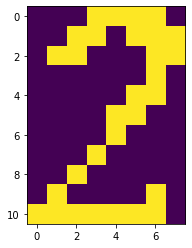

In [27]:
letter_image_file = 'extracted_letter_images/2/1.png'

image = cv2.imread(letter_image_file)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape) 
(h, w) = image.shape[:2] # note that cv.imread gets an array of h x w, h goes first
# add [:2] so that even if color image will work, not needed here though

plt.imshow(image)
plt.show()

Since `h > w`, we make sure `h` fits in our desired height value, e.g., 20:

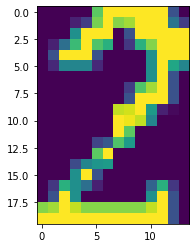

In [28]:
import imutils

image = imutils.resize(image, height=20)
# imutils.resize maintains the aspect ratio

plt.imshow(image)
plt.show()

Now we pad along width to make the image square, i.e., 20 x 20:

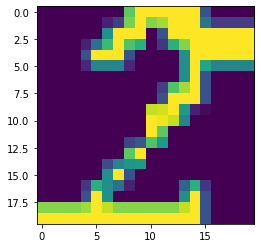

In [29]:
# determine the padding values for the width (= 20)
# to obtain the target dimensions
padW = int((20 - image.shape[1]) / 2.0) # may have rounding

# pad the image
image = cv2.copyMakeBorder(image, 0, 0, padW, padW,
        cv2.BORDER_REPLICATE)

# apply one more resizing to handle any rounding issues
image = cv2.resize(image, (20, 20))

plt.imshow(image)
plt.show()

Using what you learned, now write a function to resize images. Note that you also need to handle the possible case `h < w`:

In [35]:
def resize_to_fit(image, width, height):
    """
    A helper function to resize an image to fit within a given size
    - param image: image to resize
    - param width: desired width in pixels
    - param height: desired height in pixels
    - return: the resized image
    """

    #############################################################################
    # TODO: your code here ...                                                  #
    #############################################################################
    (h, w) = image.shape[:2]
    if h < w:
        image = imutils.resize(image, width = width)
        H = int((20 - image.shape[0]) / 2.0) 
        image = cv2.copyMakeBorder(image,0,0,H,H,
        cv2.BORDER_REPLICATE)    
    else:
        image = imutils.resize(image, height = height)
        W = int((20 - image.shape[1]) / 2.0) 
        image = cv2.copyMakeBorder(image,0,0,W,W,
        cv2.BORDER_REPLICATE)
    
    #############################################################################
    #                              END OF YOUR CODE                             #
    #############################################################################

    # return the pre-processed image
    return cv2.resize(image, (width, height))

Prepare the training and validating datasets:

In [36]:
from imutils import paths

# initialize the data and labels
data = []
labels = []

progress_folder = ''

# loop over the input images
# imutils.paths.list_images will list all images in the 32 subfolders
for image_file in paths.list_images(LETTER_IMAGES_FOLDER):
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the letter so it fits in a 20x20 pixel box
    image = resize_to_fit(image, 20, 20)

    # Add a third channel dimension to the image to make Keras happy
    image = np.expand_dims(image, axis=2)

    # Grab the name of the letter based on the folder it was in
    label = image_file.split(os.path.sep)[-2]
    # extracted_letter_images/2/000001.png, after split
    # extracted_letter_images, 2, 000001.png
    # so 2 is the 2nd last, accessed using index -2
    
    if label != progress_folder:
        print('Processing Folder', label)
        progress_folder = label
    
    # Add the letter image and it's label to our training data
    data.append(image)
    labels.append(label)

Processing Folder 2
Processing Folder 3
Processing Folder 4
Processing Folder 5
Processing Folder 6
Processing Folder 7
Processing Folder 8
Processing Folder 9
Processing Folder A
Processing Folder B
Processing Folder C
Processing Folder D
Processing Folder E
Processing Folder F
Processing Folder G
Processing Folder H
Processing Folder J
Processing Folder K
Processing Folder L
Processing Folder M
Processing Folder N
Processing Folder P
Processing Folder Q
Processing Folder R
Processing Folder S
Processing Folder T
Processing Folder U
Processing Folder V
Processing Folder W
Processing Folder X
Processing Folder Y
Processing Folder Z


Convert lists into NumPy arrays as required by Keras for input + data normalization:

In [37]:
# scale the raw pixel intensities to the range [0, 1] (this is important!!!)
data = np.array(data, dtype="float") / 255.0

# you may also use std rather than 255, and center the data by mean as follows:
#data = (np.array(data, dtype="float") - data.mean()) / data.std()
# in this case you need to remember the mean and std for use during testing later

# scaling is not needed if you use BatchNormalization after Conv2D and before Activation

labels = np.array(labels)

Split into training and validation datasets:

In [42]:
from sklearn.preprocessing import LabelBinarizer

# Convert the labels (letters) into one-hot encodings that Keras can work with
lb = LabelBinarizer().fit(labels)
print(lb.classes_)
labels = lb.transform(labels)
print()
print(labels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [43]:
import pickle

MODEL_LABELS_FILENAME = "model_labels.dat"

# Save the mapping from labels to one-hot encodings.
# We'll need this later when we use the model to decode what it's predictions mean
with open(MODEL_LABELS_FILENAME, "wb") as f:
    pickle.dump(lb, f)

Now we are ready to train it using Keras. We’ll use a simple convolutional neural network architecture with two convolutional layers and two fully-connected layers:

In [48]:
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

clear_session() # free existing Keras models

# Build the neural network!
model = Sequential()

# First convolutional layer with max pooling
model.add(Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Second convolutional layer with max pooling
model.add(Conv2D(50, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Hidden layer with 500 nodes
model.add(Flatten())
model.add(Dense(500, activation="relu"))

# Output layer with 32 nodes (one for each possible letter/number we predict)
model.add(Dense(32, activation="softmax"))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "c:\users\user\appdata\local\programs\python\python37\lib\imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "c:\users\user\appdata\local\programs\python\python37\lib\imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: DLL load failed

TypeError: can only concatenate str (not "list") to str

In [49]:
model.summary()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-49-5f15418b3570>", line 1, in <module>
    model.summary()
NameError: name 'model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python37\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_

NameError: name 'model' is not defined

In [ ]:
from tensorflow.keras.utils import plot_model

MODEL_PLOT_FILE = 'model_plot.png'
plot_model(model, to_file=MODEL_PLOT_FILE, show_shapes=True, show_layer_names=True)
display(Image(filename=MODEL_PLOT_FILE))

Questions: (1) Why `conv2d_1` has 9050 parameters? (2) Why `dense` has 625500 parameters?

Hint: self-study http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture5.pdf
    
**Type Your Answer Here:**  
(1)Because conv2d_1 is a 3-D matrix, thats why it has 9050 parameters
(2)Since all the nodes in dense have been converted to 1-D, thats why it has 625500 parameters, making it have more parameters than conv2D_1


Now, let us do the actual training:

In [ ]:
# Ask Keras to build the TensorFlow model behind the scenes
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the neural network, 20% of the data is used for validation
model.fit(data, labels, validation_split=0.20, batch_size=32, epochs=10, verbose=1)

Save the model for later use:

In [ ]:
MODEL_FILENAME = "captcha_model.hdf5"

# Save the trained model to disk
model.save(MODEL_FILENAME)

In [ ]:
#See what will happen if you do not scale your data by 255.0?
#HINT: simply train again with data/255.0 instead of 255, and see how the loss and acc look like;
#      you need to recreate your model by running the cell containing clear_session() before

#[YOUR CODE HERE]

## Step 3: Use the model to solve CAPTCHAs!

The rest part can be run independently once models are saved.

Get an image from the online demo: https://contactform7.com/captcha/ and try our model on it:

In [ ]:
# replace the url with the link of the image you see
# [Using the same image will cause points deducted !!!]
!wget https://contactform7.com/wp-content/uploads/wpcf7_captcha/844681043.png
# use the name of the file you downloaded
TEST_FILE_NAME = '844681043.png'

# show the image
from IPython.display import Image

display(Image(filename=TEST_FILE_NAME))

Load saved model data:

In [ ]:
from tensorflow.keras.models import load_model
import pickle

MODEL_FILENAME = "captcha_model.hdf5"
MODEL_LABELS_FILENAME = "model_labels.dat"

# Load up the model labels (so we can translate model predictions to actual letters)
with open(MODEL_LABELS_FILENAME, "rb") as f:
    lb = pickle.load(f)

# Load the trained neural network
model = load_model(MODEL_FILENAME)

Load packages and define functions for independent running of Part 3:

In [ ]:
import numpy as np
import imutils
import cv2

# [!!! please also run the cell defining function "resize_to_fit" again, if you run Part 3 alone]

Get the letters from the downloaded images:

In [ ]:
# Load the image and convert it to grayscale
image = cv2.imread(TEST_FILE_NAME)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Add some extra padding around the image
gray = cv2.copyMakeBorder(gray, 20, 20, 20, 20, cv2.BORDER_REPLICATE)

# threshold the image (convert it to pure black and white)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# find the contours (continuous blobs of pixels) the image
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]

letter_image_regions = []

# Now we can loop through each of the four contours and extract the letter
# inside of each one
for contour in contours:
    # Get the rectangle that contains the contour
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image_regions.append((x, y, w, h))

# If we found more or less than 4 letters in the captcha, our letter extraction
# didn't work correcly. Skip the image instead of saving bad training data!
if len(letter_image_regions) != 4:
    print('[WARNING]', TEST_FILE_NAME, 'has', len(letter_image_regions), 'contours, unable to process')
else:
    print('[SUCCESS]')

If you see a warning, use another image instead and repeat the previous steps.

Otherwise, continue to create an output image:

In [ ]:
# Sort the detected letter images based on the x coordinate to make sure
# we are processing them from left-to-right so we match the right image
# with the right letter
letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

# Create an output image and a list to hold our predicted letters
output = cv2.merge([gray] * 3) # 2D gray image -> 3D color image

# show the 3D image
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt

#Show the image with matplotlib
plt.imshow(output)
plt.show()

In [ ]:
predictions = []

# Save out each letter as a single image
for letter_bounding_box in letter_image_regions:
    # Grab the coordinates of the letter in the image
    x, y, w, h = letter_bounding_box

    # Extract the letter from the original image with a 2-pixel margin around the edge
    letter_image = gray[y - 2:y + h + 2, x - 2:x + w + 2]

    # Re-size the letter image to 20x20 pixels to match training data
    letter_image = resize_to_fit(letter_image, 20, 20)
    
    # Turn the single image into a 4D list of images to make Keras happy
    # 4D: image_number (=1) x height x width x channel (=1)
    letter_image = np.expand_dims(letter_image, axis=2)
    letter_image = np.expand_dims(letter_image, axis=0)
    
    # Ask the neural network to make a prediction
    prediction = model.predict(letter_image) # output is one-hot encoded
        
    letter = lb.inverse_transform(prediction)[0]
    # use [0] since there is only one test data's label item in the list
    predictions.append(letter)
    
    # draw the prediction on the output image
    # (255, 0, 0) = red
    cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (255, 0, 0), 1)
    cv2.putText(output, letter, (x, y - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (255, 0, 0), 1)

# see prediction result:

# Print the captcha's text
captcha_text = "".join(predictions)
print("CAPTCHA text is: {}".format(captcha_text))

# Show the annotated image
plt.imshow(output)
plt.show()

Questions: Is the prediction correct? How many letters are correctly predicted?
    
**Type Your Answer Here:**